# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [ ]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [ ]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [ ]:
import numpy as np
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y_name)

Split your data into **train** and **test** in proportion 1:4.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score.

###МЕГА ВАЖНОЕ УТОЧНЕНИЕ:
В основе классификатора $SVM$ лежит линейная модель с градиентным спуском. В связи с этим, её обучение на НЕстандартизованных данных дает крайне плохие результаты для требуемых параметров (практически нулевые).   
Покажем, что это так:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Тренируем SVM модель с линейным ядром.
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Вычисление и вывод значений параметров. Очень плохих параметров.
print("F1-measure: {0:.2f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))

F1-measure: 0.01
Accuracy: 0.01


Очевидно, что показатели плохие.   
Проблема решается применением стандартизации ($StandardScaler$ из $sklearn$) данных перед обучением $SVM:$

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Стандартизация данных.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Тренируем SVM модель с линейным ядром.
clf = SVC(kernel = 'linear')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Вычисление и вывод значений параметров. Очень хороших параметров.
print("F1-measure: {0:.2f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))

F1-measure: 0.83
Accuracy: 0.85


Как мы видим, разница в значениях колоссальная.

Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=42`

In [ ]:
from sklearn.decomposition import PCA

model_pca = PCA(n_components = 2, random_state = 42)
X_pca = model_pca.fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

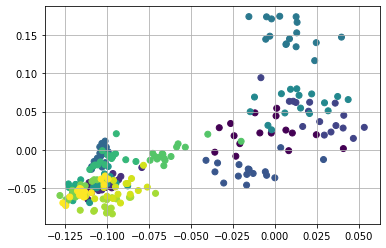

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_pca[:, 0][y <= 15], X_pca[:, 1][y <= 15], c=y[y <= 15])
plt.rc('axes', axisbelow=True)
plt.grid()
plt.show()

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


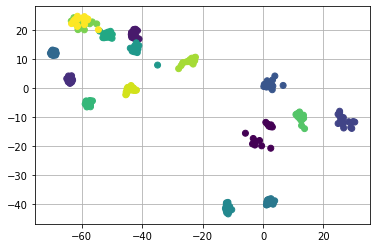

In [ ]:
from sklearn.manifold import TSNE

# Первая ячейка.
tsne_model = TSNE(n_components = 2, random_state = 42)
X_tsne = tsne_model.fit_transform(X)

# Вторая ячейка.
plt.scatter(X_tsne[:, 0][y <= 15], X_tsne[:, 1][y <= 15], c=y[y <= 15])
plt.rc('axes', axisbelow=True)
plt.grid()
plt.show()

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the TSNE method. Round the numbers to hundredths.

In [ ]:
cords_1_tsne = X_tsne[1, :]
print("x = {:.2f},".format(cords_1_tsne[0]))
print("y = {:.2f}".format(cords_1_tsne[1]))

x = 1.53,
y = -12.38


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the PCA method. Round the numbers to hundredths.

In [ ]:
cords_1_pca = X_pca[1, :]
print("x = {:.2f},".format(cords_1_pca[0]))
print("y = {:.2f}".format(cords_1_pca[1]))

x = -0.02,
y = 0.02


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

##ОТВЕТ: 2
_Пояснение:_ объекты можно было визуализировать для обоих методов, однако разделение по классам характерно только для метода $TSNE$, для метода $PCA$ разделение по классам не отражено при визуализации.

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

Переопределим тренировочные и тестовые наборы в соответствии с трансформированными в $2-d$ пространство. Будем использовать метод $TSNE:$

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size = 0.2, random_state = 17)

In [ ]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Вычисление и вывод значений параметров. Очень хороших параметров.
print("F1-measure: {0:.2f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))

F1-measure: 0.68
Accuracy: 0.71


Как мы видим, если сравнивать с результатом обучения на НЕстандартизованных данных, то метрики очень сильно увеличились до адекватных значений.   
При этом метрики для стандартизованных данных выше.

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [ ]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        # Создаем вспомогательный 3-d массив для расчетов.
        optional = np.full([self.n_clusters, X.shape[0], 2], np.nan)
        optional[self.labels, np.arange(X.shape[0]), :] = X

        # Начальный момент, когда центры еще не инициализированы.
        if self.centers is None:
          return np.nanmean(optional, axis = 1)

        # Обновление в случае инициализированных центров.
        centers = np.nanmean(optional, axis = 1)
        index = np.isnan(centers)[:, 0]
        centers[index] = self.centers[index]
        return centers
    
    def update_labels(self, X):
        optional = np.empty((self.n_clusters, X.shape[0], 2))
        optional[:, :, :] = X
        labels = np.argmin(np.linalg.norm(np.moveaxis(optional, 1, 0) - self.centers, axis=2), axis=1)
        return labels

    def fit(self, X):
        # Начальное задание.
        self.labels = np.random.randint(self.n_clusters, size=X.shape[0])
        self.centers = self.update_centers(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);
        
        return 1
    
    def predict(self, X):
        labels = self.update_labels(X)
        return labels

Generating data for clustering

In [ ]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [ ]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)** 

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

In [ ]:
cluster_3 = MyKMeans(n_clusters = 3, n_iters = 3)
cluster_3.fit(X)

# Именно метод predict() выдает результирующий label.
pred = cluster_3.predict(X[(0,),:])
print("Result label: ", pred[0])

Result label:  1


Стоить уточнить, что при таком маленьком значении количества итераций не достигается условие $Converge\ by\ tolerance\ centers$, а так как в исходной реализации присутствует $clear\_output(wait=True),$ то график исчезает.   
Если временно закомментировать строку, то есть выводить графики для каждой итерации, то получится следующий результат при $n\_iters = 3:$

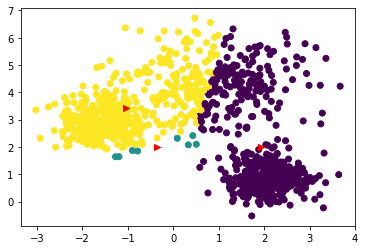

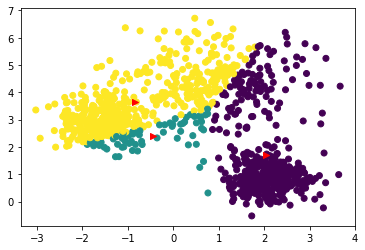

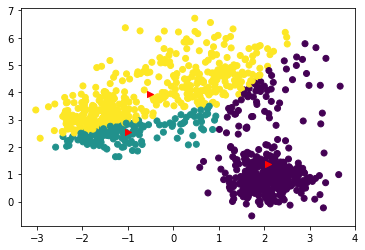

1

In [ ]:
cluster_3 = MyKMeans(n_clusters = 3, n_iters = 3)
cluster_3.fit(X)

7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers
Result label:  1


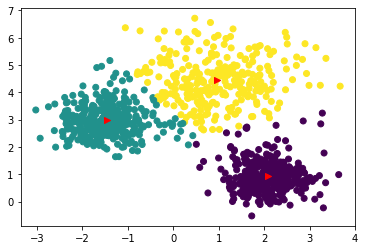

In [ ]:
cluster_100 = MyKMeans(n_clusters = 3, n_iters = 100)
cluster_100.fit(X)
pred = cluster_100.predict(X[(0,),:])
print("Result label: ", pred[0])

Как мы видим, при большем значении итераций удалось достигнуть сближения центров, а значит график отобразился без дополнительных манипуляций с исходным кодом.   
Результирующий $label$ при этом не изменился.

7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [ ]:
pred_3 = cluster_3.predict(X)
pred_100 = cluster_100.predict(X)

num_of_changed = np.sum(pred_3 != pred_100)
print("Objects changed: ", num_of_changed)

Objects changed:  93


**Task 8. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

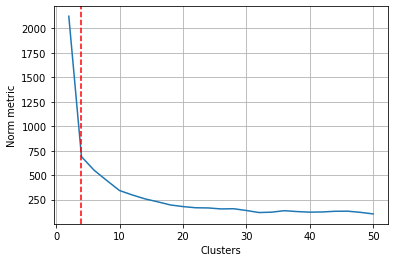

In [ ]:
# Будем считать, что подразумевался диапазон [2; 50].
param_k = np.arange(2, 51, 2)
y_value = param_k * 0

# Проход по всем значениям параметра k.
for index in range(0, len(param_k)):
  clusters = param_k[index]
  cluster_k = MyKMeans(n_clusters = clusters)
  cluster_k.fit(X)
  k_pred = cluster_k.predict(X)
  # Расчитываем метрику как сумму квадратов дистанций между данными и центроидами.
  # linalg.norm(), так как мы работаем с K-means кластеризацией.
  y_value[index] = np.sum(np.linalg.norm(X - cluster_k.centers[k_pred, :], axis=1)**2)

clear_output(wait=False)
plt.close()

plt.plot(param_k, y_value)
plt.axvline(x = 4, linestyle = '--', color = 'r')
plt.xlabel("Clusters")
plt.ylabel("Norm metric")
plt.grid()
plt.show()

Согласно методу локтя, на графике отчетливо видна $elbow\ point=4,$ то есть оптимальное число кластеров равно $4.$

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

Response:  0


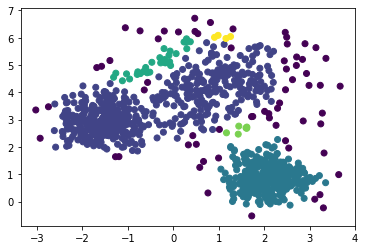

In [ ]:
from sklearn.cluster import DBSCAN

# Кластеризация.
dbscan_model = DBSCAN(eps = 0.3)
y_pred = dbscan_model.fit_predict(X, y)
print("Response: ", y_pred[2])

# Построение графика.
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

**Task 10. <a id="task8"></a> (1 point)** 

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

Дабы не 

DBSCAN eps = 0.1, min_samples = 2:
Number of clusters: 111,
Outliers: 253,
Plot results:


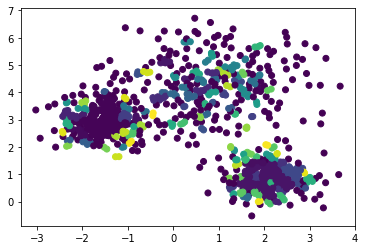


DBSCAN eps = 0.1, min_samples = 5:
Number of clusters: 25,
Outliers: 567,
Plot results:


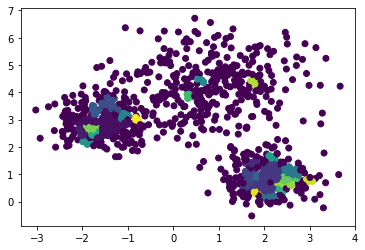


DBSCAN eps = 0.1, min_samples = 7:
Number of clusters: 15,
Outliers: 730,
Plot results:


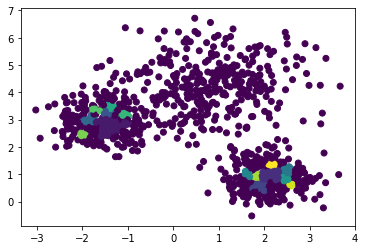


DBSCAN eps = 0.1, min_samples = 10:
Number of clusters: 5,
Outliers: 902,
Plot results:


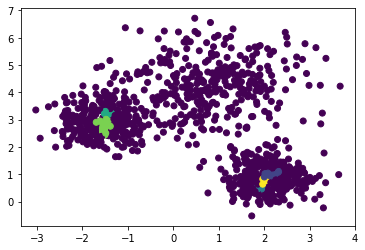


DBSCAN eps = 0.1, min_samples = 13:
Number of clusters: 1,
Outliers: 987,
Plot results:


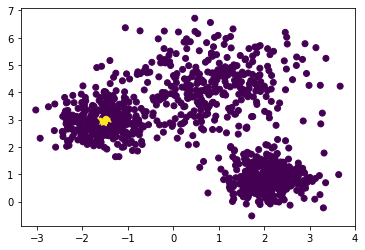


DBSCAN eps = 0.2, min_samples = 2:
Number of clusters: 31,
Outliers: 68,
Plot results:


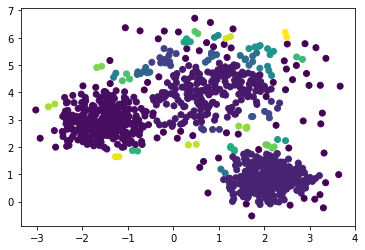


DBSCAN eps = 0.2, min_samples = 5:
Number of clusters: 10,
Outliers: 161,
Plot results:


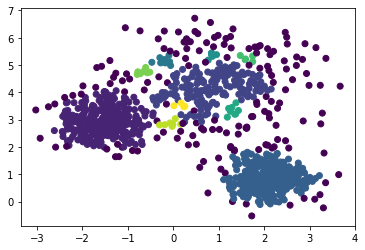


DBSCAN eps = 0.2, min_samples = 7:
Number of clusters: 12,
Outliers: 234,
Plot results:


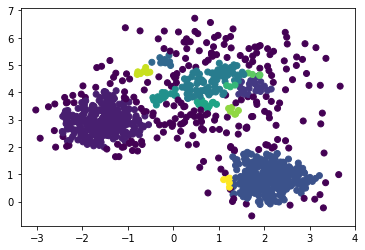


DBSCAN eps = 0.2, min_samples = 10:
Number of clusters: 5,
Outliers: 387,
Plot results:


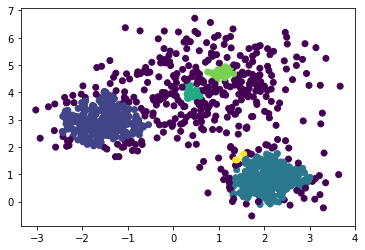


DBSCAN eps = 0.2, min_samples = 13:
Number of clusters: 2,
Outliers: 466,
Plot results:


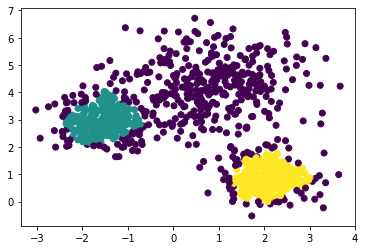


DBSCAN eps = 0.3, min_samples = 2:
Number of clusters: 13,
Outliers: 26,
Plot results:


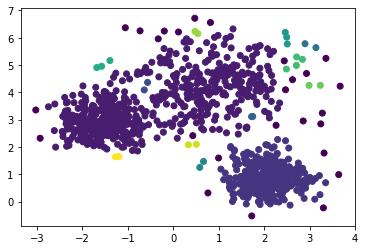


DBSCAN eps = 0.3, min_samples = 5:
Number of clusters: 5,
Outliers: 65,
Plot results:


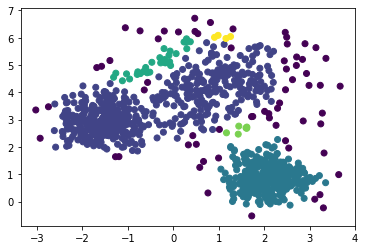


DBSCAN eps = 0.3, min_samples = 7:
Number of clusters: 4,
Outliers: 91,
Plot results:


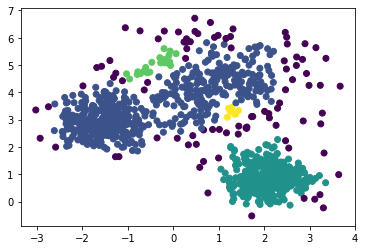


DBSCAN eps = 0.3, min_samples = 10:
Number of clusters: 4,
Outliers: 145,
Plot results:


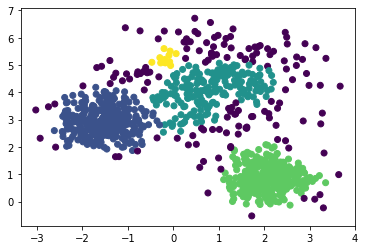


DBSCAN eps = 0.3, min_samples = 13:
Number of clusters: 4,
Outliers: 197,
Plot results:


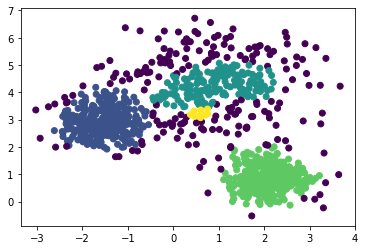


DBSCAN eps = 0.4, min_samples = 2:
Number of clusters: 8,
Outliers: 8,
Plot results:


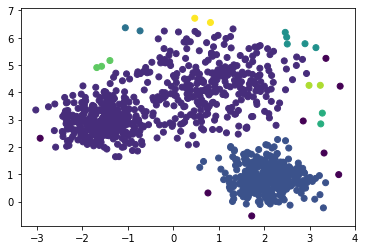


DBSCAN eps = 0.4, min_samples = 5:
Number of clusters: 2,
Outliers: 27,
Plot results:


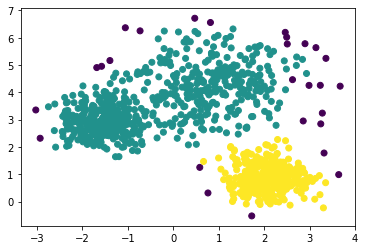


DBSCAN eps = 0.4, min_samples = 7:
Number of clusters: 2,
Outliers: 39,
Plot results:


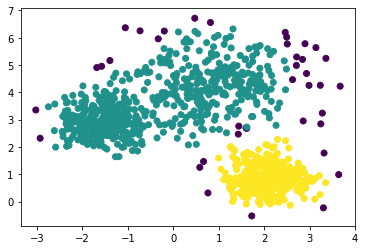


DBSCAN eps = 0.4, min_samples = 10:
Number of clusters: 2,
Outliers: 61,
Plot results:


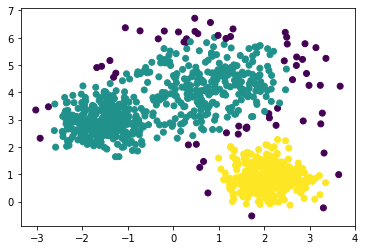


DBSCAN eps = 0.4, min_samples = 13:
Number of clusters: 3,
Outliers: 88,
Plot results:


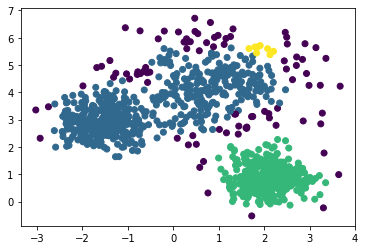


DBSCAN eps = 0.5, min_samples = 2:
Number of clusters: 2,
Outliers: 2,
Plot results:


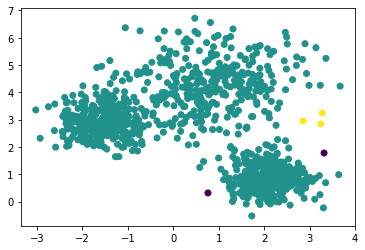


DBSCAN eps = 0.5, min_samples = 5:
Number of clusters: 1,
Outliers: 11,
Plot results:


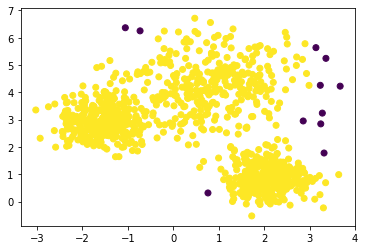


DBSCAN eps = 0.5, min_samples = 7:
Number of clusters: 1,
Outliers: 14,
Plot results:


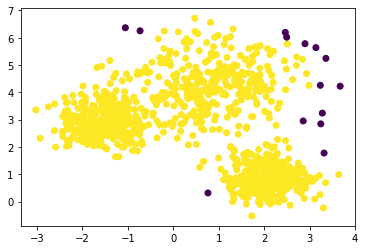


DBSCAN eps = 0.5, min_samples = 10:
Number of clusters: 2,
Outliers: 22,
Plot results:


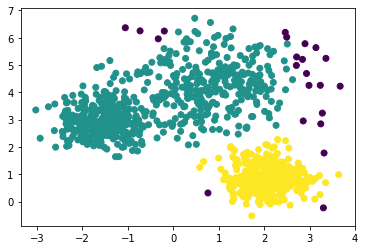


DBSCAN eps = 0.5, min_samples = 13:
Number of clusters: 2,
Outliers: 35,
Plot results:


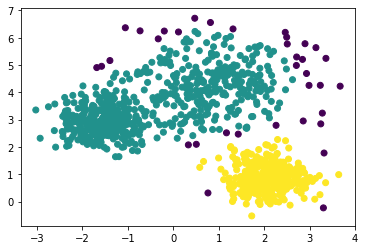

In [ ]:
# Задаем значения для рассматриваемых параметров.
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples = [2, 5, 7, 10, 13]

# Проход по каждой комбинации параметров.
for index in range(0, len(epsilons)):
  for jndex in range(0, len(min_samples)):
    # Кластеризация.
    dbscan_model = DBSCAN(eps = epsilons[index], min_samples = min_samples[jndex])
    y_pred = dbscan_model.fit_predict(X, y)
    print(f"DBSCAN eps = {epsilons[index]}, min_samples = {min_samples[jndex]}:")
    # Вычисление количества кластеров и outliers.
    print(f"Number of clusters: {np.unique(y_pred[y_pred != -1]).size},")
    print(f"Outliers: {np.sum(y_pred == -1)},")
    print("Plot results:")
    # Построение графика.
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.show()
    print()

Как видно по графикам и расчетам, количество кластеров зависит от значений $eps$ - при росте параметра заметно уменьшается количество кластеров. При этом в рамках одного значения $eps$ нельзя сказать о зависимости количества кластеров от значения $min\_samples.$   
Значение $outliers$ так же, как и количество кластеров, уменьшается в ростом $eps,$ в рамках каждого значения $eps$ с ростом значения $min\_samples$ показатель $outliers$ всегда увеличивается.